## Dataset (Load , exploration and  Cleaning)


In [1]:
# calculations and Dataframe
import pandas as pd
import numpy as np

# plot facial expression 
import matplotlib.pyplot as plt
from skimage import io

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras


# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle

# Paquetes necesarios para la conversión de imágenes de color a escala de grises
from skimage.color import rgb2gray
from skimage.filters import gaussian


d:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# load dataset
dataset_facial_expression = pd.read_csv("../fer2013.csv")



#### Data exploration

In [3]:
# display the top five
dataset_facial_expression.head()


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
# display the last five
dataset_facial_expression.tail()


,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


#### Detecting missing, nan or null

In [5]:
# Summary statistics: Numeric data
dataset_facial_expression.describe()


,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [6]:
# verifying the type  
type(dataset_facial_expression)


pandas.core.frame.DataFrame

In [7]:
# verifying the size  
len(dataset_facial_expression)


35887

In [8]:
# verifying the info  
dataset_facial_expression.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [9]:
# shuffling its contents.
dataset_facial_expression = dataset_facial_expression.sample(frac=1).reset_index(drop=True)
dataset_facial_expression


,emotion,pixels,Usage
0,5,52 26 15 10 5 6 12 14 37 53 66 72 78 83 88 94 ...,Training
1,4,175 185 187 173 174 181 191 195 203 219 222 22...,PrivateTest
2,6,191 196 200 201 201 202 205 208 210 212 213 21...,Training
3,4,54 52 55 58 60 61 60 58 60 60 60 60 62 63 61 6...,Training
4,3,167 150 153 154 157 154 131 131 148 156 175 17...,PrivateTest
5,0,11 16 10 5 3 7 20 17 7 13 10 11 4 11 15 8 5 7 ...,Training
6,6,35 30 48 44 43 46 51 63 64 63 59 52 56 38 23 1...,Training
7,0,18 29 19 13 18 19 18 24 31 42 42 39 35 37 38 3...,Training
8,3,227 227 226 226 226 226 227 227 227 227 225 22...,Training
9,2,99 99 100 94 45 39 38 39 40 37 41 41 37 41 49 ...,PublicTest


#### Data Exploration and plot pixels

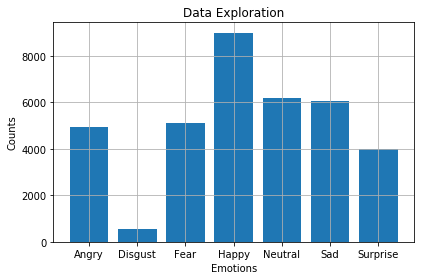

,emotion,count
3,Happy,8989
6,Neutral,6198
4,Sad,6077
2,Fear,5121
0,Angry,4953
5,Surprise,4002
1,Disgust,547


In [10]:
# Histogram of the emotions frecuency 
delais_emotion_label = ("Happy" , "Neutral", "Sad", "Fear" , "Angry", "Surprise" ,"Disgust")
delais_emotion = pd.DataFrame(data=dataset_facial_expression["emotion"].value_counts())

delais_emotion["count"] = delais_emotion["emotion"]
delais_emotion["emotion"] = delais_emotion_label
delais_emotion
%matplotlib inline
fig, ax = plt.subplots()

ax.bar(delais_emotion["emotion"], delais_emotion["count"] )
ax.set_title("Data Exploration")
ax.set_ylabel("Counts")
ax.set_xlabel("Emotions")
ax.grid()

fig.tight_layout()
plt.show()
delais_emotion


## 

In [11]:
# Agree of data exploration , it concludes that the Dataframe have not the format for pass to model 
# Now I must create the matrix with dimensions (35887, 48 ,48) and fill witch the information that contents dataframe
y = np.zeros((35887, 48, 48))
#35887
for i in range(35887):
    imagen = dataset_facial_expression["pixels"][0+i]
    imagen_list_pixel = imagen.split(" ")
    imagen_array_pixel = np.asarray(imagen_list_pixel, dtype=float)   
    imagen_rezise_pixel = imagen_array_pixel.reshape(-1,48,48)
    """image_gray = rgb2gray(imagen_rezise_pixel[0])
    imagen_array_pixel = np.asarray(image_gray, dtype=float)
    imagen_rezise_pixel = imagen_array_pixel.reshape(-1,48,48)
    image_gray = rgb2gray(imagen_rezise_pixel[0])
    image_gray = gaussian(image_gray, 1)
    image_eroded = image_gray-erosion(image_gray,disk(1.8))
    imagen_array_pixel = np.asarray(image_gray, dtype=float)
    imagen_rezise_pixel = imagen_array_pixel.reshape(-1,48,48)"""
    y[i] = y[i]+imagen_rezise_pixel[0]
    

In [12]:
# I must create the dataset for train with 80% of the information and dataset for test with 20% remaining
train_images = y[:28709]
train_labels = np.array(dataset_facial_expression["emotion"][:28709])
test_images = y[28710:]
test_labels = np.array( dataset_facial_expression["emotion"][28710:])

train_images = train_images / 255.0
test_images = test_images / 255.0

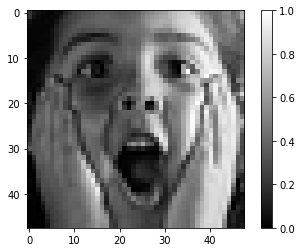

In [13]:
# Plot one for verify the functioning correct  of the datasets
plt.figure()
plt.imshow(train_images[0], cmap="gray")
plt.colorbar()
plt.grid(False)

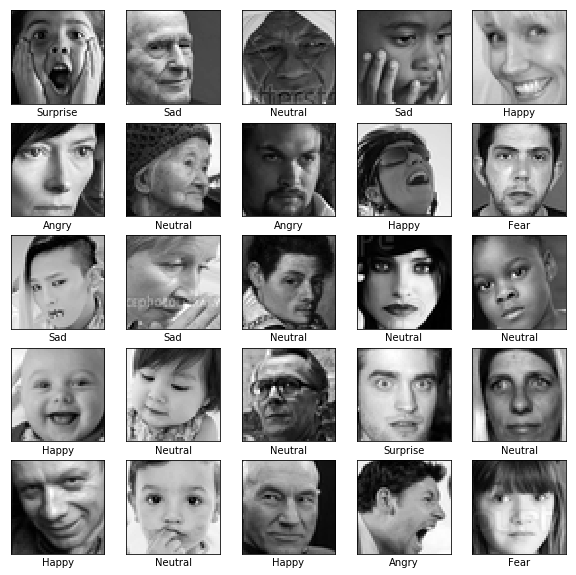

In [14]:
# Plot twenty five  for verify the labes and photos
class_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap="gray")
    plt.xlabel(class_names[train_labels[i]]) 


In [18]:
# created the model 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(48, 48)),
    keras.layers.Dense(48, activation=tf.nn.relu),
    keras.layers.Dense(7, activation=tf.nn.softmax)
])

In [19]:
# defined the optimizer , loss and metrics
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
# run training 1000 times
model.fit(train_images, train_labels, epochs=200)

Epoch 1/200
28709/28709 [==============================] - 3s 98us/step - loss: 1.8074 - acc: 0.2636
Epoch 2/200
28709/28709 [==============================] - 2s 84us/step - loss: 1.7501 - acc: 0.2890
Epoch 3/200
28709/28709 [==============================] - 2s 84us/step - loss: 1.7209 - acc: 0.3156
Epoch 4/200
28709/28709 [==============================] - 2s 84us/step - loss: 1.7082 - acc: 0.3181
Epoch 5/200
28709/28709 [==============================] - 2s 85us/step - loss: 1.7017 - acc: 0.3251
Epoch 6/200
28709/28709 [==============================] - 2s 85us/step - loss: 1.6933 - acc: 0.3296
Epoch 7/200
28709/28709 [==============================] - 2s 86us/step - loss: 1.6831 - acc: 0.3351
Epoch 8/200
28709/28709 [==============================] - 3s 91us/step - loss: 1.6794 - acc: 0.3361
Epoch 9/200
28709/28709 [==============================] - 2s 84us/step - loss: 1.6771 - acc: 0.3377
Epoch 10/200
28709/28709 [==============================] - 2s 85us/step - loss: 1.6713 - a

28709/28709 [==============================] - 2s 82us/step - loss: 1.6095 - acc: 0.3617
Epoch 161/200
28709/28709 [==============================] - 2s 83us/step - loss: 1.6143 - acc: 0.3604
Epoch 162/200
28709/28709 [==============================] - 2s 82us/step - loss: 1.6114 - acc: 0.3608
Epoch 163/200
28709/28709 [==============================] - 2s 83us/step - loss: 1.6120 - acc: 0.3610
Epoch 164/200
28709/28709 [==============================] - 2s 84us/step - loss: 1.6138 - acc: 0.3605
Epoch 165/200
28709/28709 [==============================] - 2s 82us/step - loss: 1.6108 - acc: 0.3623
Epoch 166/200
28709/28709 [==============================] - 2s 82us/step - loss: 1.6110 - acc: 0.3628
Epoch 167/200
28709/28709 [==============================] - 2s 81us/step - loss: 1.6117 - acc: 0.3621
Epoch 168/200
28709/28709 [==============================] - 2s 83us/step - loss: 1.6095 - acc: 0.3605
Epoch 169/200
28709/28709 [==============================] - 2s 82us/step - loss: 1.608

In [ ]:
# evaluated the model vs dataset test
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

In [ ]:
# run preditions
predictions = model.predict(test_images)
len(predictions)


In [ ]:
predictions[0]

In [ ]:
np.argmax(predictions[0])

In [ ]:
# Defined funtion for plot results
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap="gray")
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'green'  
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)



In [ ]:
# plot results
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)

